In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
#print(digits)

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
# Print out the data
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
# Print out the target values
print(digits.target)



[0 1 2 ... 8 9 8]


In [6]:
# Print out the description of the `digits` data
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [20]:
# Isolate the `digits` data
digits_data = digits.data

In [21]:
# Inspect the shape
print(digits_data.shape)

(1797, 64)


In [22]:
# Isolate the target values with `target`
digits_target = digits.target

In [23]:
# Inspect the shape
print(digits_target.shape)


(1797,)


In [24]:
# Print the number of unique labels
number_digits = len(np.unique(digits.target))
print(number_digits)

10


In [25]:
print(np.all(digits.images.reshape((1797,64)) == digits.data))


True


In [26]:
# Import matplotlib
import matplotlib.pyplot as plt

# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

In [29]:
# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

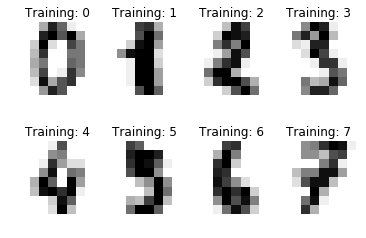

In [30]:
# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

In [31]:
 from sklearn.decomposition import PCA
# Create a Randomized PCA model that takes two components
randomized_pca = PCA(svd_solver='randomized',n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

(1797, 2)

In [32]:
# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.25946348  21.27488332]
 [  7.95761927 -20.76870164]
 [  6.99191574  -9.95598521]
 ..., 
 [ 10.80128077  -6.96024723]
 [ -4.8720927   12.42394149]
 [ -0.34439878   6.36555456]]
[[ -1.25946568  21.27488433]
 [  7.9576106  -20.76869663]
 [  6.99192255  -9.95598937]
 ..., 
 [ 10.80128468  -6.96025086]
 [ -4.87210227  12.42395169]
 [ -0.34438845   6.36554843]]


In [33]:
# Import
from sklearn.preprocessing import scale
print(data.shape)# Import `train_test_split`
from sklearn.cross_validation import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)
# Apply `scale()` to the `digits` data
data = scale(digits.data)
print(data.shape)

NameError: name 'data' is not defined

In [33]:
# Import `train_test_split`
from sklearn.cross_validation import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

D:\ProgramData\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

# Inspect `y_train`
print(len(y_train))

1347
64
1347


In [35]:
# Import the `cluster` module
from sklearn import cluster

# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

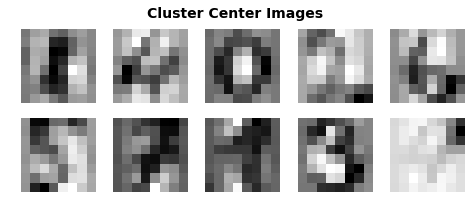

In [36]:
# Import matplotlib
import matplotlib.pyplot as plt

# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

In [37]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

# Study the shape of the cluster centers
clf.cluster_centers_.shape

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


(10, 64)

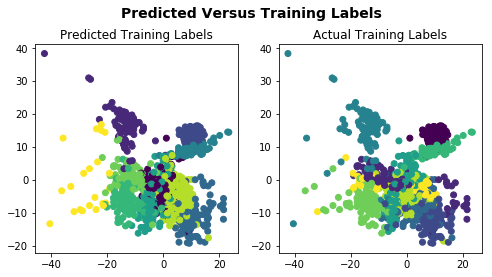

In [38]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

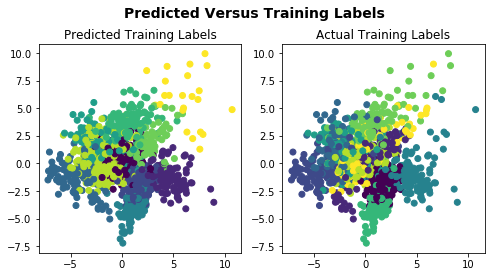

In [39]:
# Import `PCA()`
from sklearn.decomposition import PCA

# Model and fit the `digits` data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

In [40]:
# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


In [41]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

inertia    homo   compl  v-meas     ARI AMI  silhouette
54276   0.688   0.733   0.710   0.567   0.674    0.146


In [42]:
# Import `train_test_split`
from sklearn.cross_validation import train_test_split

# Split the data into training and test sets 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
# Split the `digits` data into two equal sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)

# Import GridSearchCV
from sklearn.grid_search import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

D:\ProgramData\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best score for training data: 0.9844097995545658
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001


In [44]:
# Apply the classifier to the test data, and view the accuracy score
clf.score(X_test, y_test)  

# Train and score a new classifier with the grid search parameters
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)

0.99110122358175756

In [45]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 2 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 5 3 6 2 1 6 2
 1 7 5 5 1 9 2 8 9 7 2 1 4 9 3 2 6 2 5 9 6 5 8 2 0 7 8 0 5 8 4 1 8 6 4 3 4
 2 0 4 5 8 3 3 1 8 3 4 5 

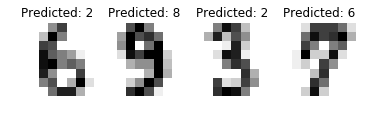

In [46]:
# Import matplotlib
import matplotlib.pyplot as plt

# Assign the predicted values to `predicted`
predicted = svc_model.predict(X_test)

# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 4, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()

In [47]:
# Import `metrics`
from sklearn import metrics

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        89
          1       0.99      1.00      0.99        90
          2       0.99      1.00      0.99        92
          3       0.99      0.97      0.98        93
          4       1.00      0.99      0.99        76
          5       0.98      1.00      0.99       108
          6       1.00      1.00      1.00        89
          7       1.00      1.00      1.00        78
          8       1.00      0.99      0.99        92
          9       0.99      0.99      0.99        92

avg / total       0.99      0.99      0.99       899

[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  90   0   0   0   0   0   0   0   0]
 [  0   0  92   0   0   0   0   0   0   0]
 [  0   0   1  90   0   1   0   0   0   1]
 [  0   1   0   0  75   0   0   0   0   0]
 [  0   0   0   0   0 108   0   0   0   0]
 [  0   0   0   0   0   0  89   0   0   0]
 [  0   0   0   0   0   0   0  78   0   0]
 [  0   0   0   0

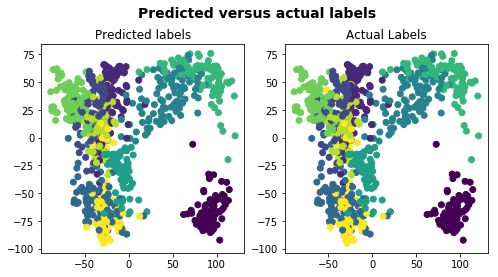

In [48]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
predicted = svc_model.predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# Show the plot
plt.show()